In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import time

In [30]:
def update_s(wn, w, phi, Phi, r, r_d, x, x_d, ar, ax, h, N):
    
    new_Phi = np.array([[0.0], [0.0], [0.0]])  # Phase
    new_r = np.array([[0.0], [0.0], [0.0]])   # Amplitude
    new_r_d = np.array([[0.0], [0.0], [0.0]])   # Amplit|ude_D
    new_x = np.array([[0.0], [0.0], [0.0]])   # Offset
    new_x_d = np.array([[0.0], [0.0], [0.0]])   # Offset_D
    theta = np.array([[0.0], [0.0], [0.0]])

    for i in range(N):
        Phi_d = np.copy(wn[i]) 
        for j in range(N):
            Phi_d += w[i,j] * r[j] * np.sin(Phi[j] - Phi[i] - phi[i,j])
        new_Phi[i] = Phi[i] + h * Phi_d
    
    for i in range(N):
        r_dd = ar * ( (ar/4) * (R[i]-r[i]) - r_d[i])
        new_r_d[i] = r_d[i] + h * r_dd
        new_r[i] = r[i] + h * r_d[i]

    for i in range(N):
        x_dd = ax * ( (ax/4) * (X[i]-x[i]) - x_d[i])
        new_x_d[i] = x_d[i] + h * x_dd
        new_x[i] = x[i] + h * new_x_d[i]
        
    for i in range(N):
        theta[i] =  x[i] + r[i] * np.sin(new_Phi[i])
        
    return (np.copy(new_Phi), np.copy(new_r), np.copy(new_r_d), np.copy(new_x), np.copy(new_x_d, np.copy(theta))
    

In [31]:
# Constants
N=3 # Three Oscillators
ar=100 # rad/s
ax=100 # rad/s
wn = np.array([[1.0], [1.0], [1.0]]) # natural frequency: "speed"|

# Coupling Weights (in 1/s=Hz)
w = np.matrix([[0,   0, 0],
               [0.5, 0, 0],
               [0.5, 0, 0]])


# Phase Bias (in rad)\
PI = math.pi
phi_fwd = np.matrix([[0    , 0, 0],
                     [PI/2 , 0, 0],
                     [-PI/2, 0, 0]])
phi_bwd = np.matrix([[0    , 0, 0],
                     [-PI/2 , 0, 0],
                     [PI/2, 0, 0]])
phi_rtr = np.matrix([[0    , 0, 0],
                     [PI/2 , 0, 0],
                     [PI/2, 0, 0]])
phi_rtl = np.matrix([[0    , 0, 0],
                     [-PI/2 , 0, 0],
                     [-PI/2, 0, 0]])
phi = phi_fwd

# Target Values
R = np.array([[12.0], [40.0], [40.0]])     # Amplitude
X = np.array([[0.0], [0.0], [0.0]])    # Offset

# State Variables
Phi = np.array([[0.0], [0.0], [0.0]])  # Phase
r = np.array([[0.0], [0.0], [0.0]])   # Amplitude
r_d = np.array([[0.0], [0.0], [0.0]])   # Amplit|ude_D
x = np.array([[0.0], [0.0], [0.0]])   # Offset
x_d = np.array([[0.0], [0.0], [0.0]])   # Offset_D

theta = None
Phi_plot = None

# Starts With Forwards
gait_switch = [( 0, phi_fwd,"Forward"),
#                (12, phi_rtr, "CWR"),
#                (24, phi_bwd, 'Backward'),
#                (36, phi_rtl, "CCWR"),
#                (48, phi_fwd, 'Forward')
              ]
gait_o = gait_switch

sim_time = 60 # seconds
h = 0.01 # euler step length in seconds
for step in range(0,int(sim_time/h)):
    if len(gait_switch) and step*h > gait_switch[0][0]:
        phi = gait_switch[0][1]
        gait_switch = gait_switch[1:]
    
    
    Phi, r, r_d, x, x_d, n_theta = update_s(wn, w, phi, Phi, r, r_d, x, x_d, ar, ax, h, N)
    if theta is None:
        theta = n_theta
        Phi_plot = np.transpose(Phi)
    else:
        theta = np.vstack((theta, n_theta))
        Phi_plot = np.vstack((Phi_plot, np.transpose(Phi)))

IndexError: index 1 is out of bounds for axis 1 with size 1

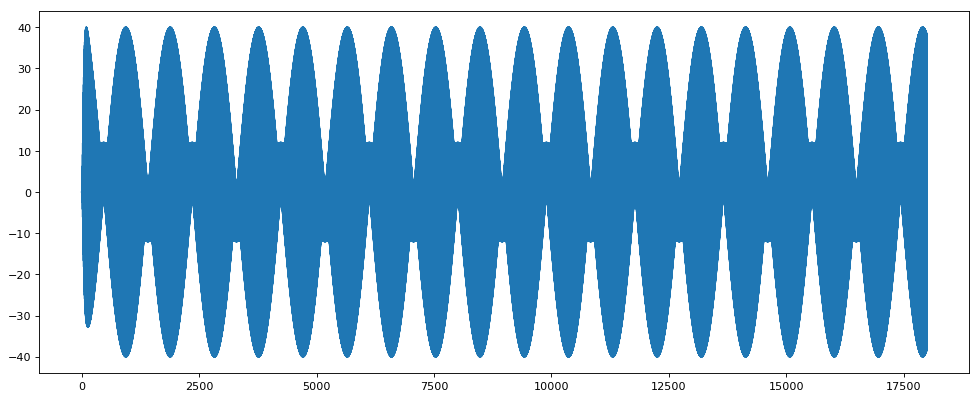

In [32]:
plt.figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
plt_m1, = plt.plot(theta[:,0], label='Motor 1')
plt_m2, = plt.plot(theta[:,1], label="Motor 2")
plt_m3, = plt.plot(theta[:,2], label="Motor 3")

colors = ['red', 'red', 'green', 'blue','magenta']
# plt.axvspan(0, gait_o[0][0]/h, color=colors[0], alpha=0.1)
# plt.text( (gait_o[0][0]/h - 0)/2, 45, gait_o[0][2] , fontsize=15, horizontalalignment='center')
for idx, gait in enumerate(gait_o[1:]):
    plt.axvspan(gait_o[idx][0]/h, gait_o[idx+1][0]/h, color=colors[idx+1], alpha=0.1)
    plt.text((gait_o[idx+1][0] + gait_o[idx][0])/h/2 , 45, gait_o[idx][2],
             fontsize=15, horizontalalignment='center')
plt.axvspan(gait_o[-1][0]/h, sim_time/h, color='brown', alpha=0.1)
plt.text( (sim_time/h + gait_o[-1][0]/h)/2, 45, gait_o[-1][2] , fontsize=15, horizontalalignment='center')
plt.legend(handles=[plt_m1, plt_m2, plt_m3])


plt.figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
plt_m1, = plt.plot(Phi_plot[:,0], label='Motor 1')
plt_m2, = plt.plot(Phi_plot[:,1], label="Motor 2")
plt_m3, = plt.plot(Phi_plot[:,2], label="Motor 3")
plt.legend(handles=[plt_m1, plt_m2, plt_m3])

In [14]:
 
        for i in range(N):
            Phi_d += w[n][i] * r[i] * sin(Phi[i] - Phi[n] - phi[n][i])

IndentationError: unexpected indent (<ipython-input-14-e6ab799517b1>, line 2)

In [15]:
range(N)

range(0, 3)

In [16]:
print(w[3,0])

IndexError: index 3 is out of bounds for axis 0 with size 3

In [125]:
new_Phi = np.array([[1.0], [2.0], [3.0]])
print(new_Phi[0]+5)

[ 6.]


In [29]:
Phi_plot

array([[  1.00000000e-02,   1.00000000e-02,   1.00000000e-02],
       [  2.00000000e-02,   2.00000000e-02,   2.00000000e-02],
       [  3.00000000e-02,   1.50000000e-02,   4.50000000e-02],
       ..., 
       [  5.99800000e+01,   5.84092037e+01,   6.15507963e+01],
       [  5.99900000e+01,   5.84192037e+01,   6.15607963e+01],
       [  6.00000000e+01,   5.84292037e+01,   6.15707963e+01]])